In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Python version: 3.8.5 (default, Sep  4 2020, 07:30:14) 
[GCC 7.3.0]
pandas version: 1.1.3
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.19.0
scikit-learn version: 0.23.2
-------------------------
1.ipynb
2.ipynb
3.ipynb
gender_submission.csv
test.csv
train.csv



In [68]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#from pandas.tools.plotting import scatter_matrix
from pandas.plotting import autocorrelation_plot
#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [69]:
data_raw= pd.read_csv('train.csv')
data_val= pd.read_csv('test.csv')

In [70]:
#to play with our data we'll create a copy
data1 = data_raw.copy(deep=True)
#however passing by reference is convenient, because we can clean both datasets at once
data_cleaner = [data1,data_val]

In [71]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
data_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,NaN,S
697,698,1,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
586,587,0,2,"Jarvis, Mr. John Denzil",male,47.0,0,0,237565,15.0000,NaN,S
415,416,0,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S
234,235,0,2,"Leyson, Mr. Robert William Norman",male,24.0,0,0,C.A. 29566,10.5000,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9000,NaN,S


In [73]:
print('Train columns with null values:\n',data1.isnull().sum())
print('-'*10)
print('Test/Validation columns with null values:\n',data_val.isnull().sum())
print('-'*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


In [74]:
data_raw.describe(include='all')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bystrom, Mrs. (Karolina)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [75]:
###COMPLETING: complete or delete missing values in train and test/validation dataset
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)
    
#delete the cabin feature/column and others previously stated to exclude in train dataset
drop_column = ['PassengerId','Cabin', 'Ticket']
data1.drop(drop_column, axis=1, inplace = True)

print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [76]:
# Create: freture engineering for train and validation dataset 
for dataset in data_cleaner:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1 # initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1 ] = 0 # update to no/0 if family size is greater than one
    
    #Spliting title names 
    dataset['Title'] = dataset['Name'].str.split(',',expand=True)[1].str.split('.',expand=True)[0]
    
    #Fare bins using qcut
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)
    
    #Age bins using cut
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int),5)
    
    

In [77]:
# Cleanup rare title names
print(data1['Title'].value_counts())

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Col               2
 Major             2
 Ms                1
 Capt              1
 the Countess      1
 Mme               1
 Don               1
 Sir               1
 Lady              1
 Jonkheer          1
Name: Title, dtype: int64


In [78]:
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min) # creating a true /false series
print(title_names)

 Mr              False
 Miss            False
 Mrs             False
 Master          False
 Dr               True
 Rev              True
 Mlle             True
 Col              True
 Major            True
 Ms               True
 Capt             True
 the Countess     True
 Mme              True
 Don              True
 Sir              True
 Lady             True
 Jonkheer         True
Name: Title, dtype: bool


In [79]:
# applying some lambda functions 
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print('-'*15)
print(data1.columns)

 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
---------------
Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin', 'AgeBin'],
      dtype='object')


In [80]:
data1.info()
data_val.info()
data1.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
295,0,1,"Lewy, Mr. Ervin G",male,28.0,0,0,27.7208,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]"
286,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,9.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
516,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,10.5000,S,1,1,Mrs,"(7.91, 14.454]","(32.0, 48.0]"
26,0,3,"Emir, Mr. Farred Chehab",male,28.0,0,0,7.2250,C,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
260,0,3,"Smith, Mr. Thomas",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
737,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C,1,1,Mr,"(31.0, 512.329]","(32.0, 48.0]"
852,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,15.2458,C,3,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
74,1,3,"Bing, Mr. Lee",male,32.0,0,0,56.4958,S,1,1,Mr,"(31.0, 512.329]","(16.0, 32.0]"
776,0,3,"Tobin, Mr. Roger",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
87,0,3,"Slocovski, Mr. Selman Francis",male,28.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"


In [81]:
#Convert objects to category using label encoder for training and validation dataset

#Code for categorical data
label = LabelEncoder()
for dataset in data_cleaner:    
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])


In [82]:
# Define y variable 
Target = ['Survived']

# Define x variables

#Names for charts
data1_x = ['Sex','Pclass','Embarked','Title','SibSp','Parch','Age','Fare','FamilySize','IsAlone']

#Code for algorithm calculation 
data1_x_calc = ['Sex_Code','Pclass','Embarked_Code','Title_Code','SibSp','Parch','Age','Fare']

data1_xy = Target + data1_x

print(data1_xy)

['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']


In [83]:
# define x variables for original features to remove continous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data_xy_bin = Target + data1_x_bin
print(data_xy_bin)

['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']


In [84]:
#define x and y variables for dummy features
data1_dummy = pd.get_dummies(data1[data1_x])
print(data1.columns)
print('Data1_dummy',data1_dummy.columns )
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'FamilySize', 'IsAlone', 'Title', 'FareBin', 'AgeBin',
       'Sex_Code', 'Embarked_Code', 'Title_Code', 'AgeBin_Code',
       'FareBin_Code'],
      dtype='object')
Data1_dummy Index(['Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone',
       'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs',
       'Title_Misc'],
      dtype='object')
Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



In [85]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


In [86]:
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   FamilySize     891 non-null    int64   
 10  IsAlone        891 non-null    int64   
 11  Title          891 non-null    object  
 12  FareBin        891 non-null    category
 13  AgeBin         891 non-null    category
 14  Sex_Code       891 non-null    int64   
 15  Embarked_Code  891 non-null    int64   
 16  Title_Code     891 non-null    int64   
 17  AgeBin_Code    891 non-n

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Bystrom, Mrs. (Karolina)",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [87]:
#split train and test data with function defaults

train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)


print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()

Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,2,1,1,0
68,0,3,2,1,7,1,1
253,1,3,2,2,2,1,2
320,1,3,2,2,1,1,0
706,0,2,2,3,1,2,1


In [88]:
#Discrete variable correlation 
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correlation by: ',x)
        print(data1[[x,Target[0]]].groupby(x,as_index=False).mean())
        print('-'*10, '\n')

Survival Correlation by:  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by:  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by:  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by:  Title
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
---------- 

Survival Correlation by:  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correlation by:  Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correlation by:  FamilySize
   FamilySize  Survived
0           1

In [89]:
#using crosstabs
print(pd.crosstab(data1['Title'],data1[Target[0]]))

Survived    0    1
Title             
 Master    17   23
 Miss      55  127
 Mr       436   81
 Mrs       26   99
Misc       15   12


In [90]:
#graph distrubution of quantitative data

In [91]:
plt.figure(figsize=[16,12])

<Figure size 1152x864 with 0 Axes>

<Figure size 1152x864 with 0 Axes>

Text(0, 0.5, 'Fare($)')

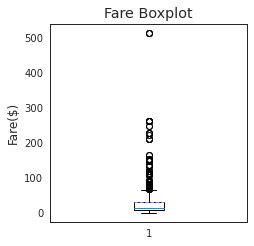

In [92]:
plt.subplot(231)
plt.boxplot(x=data1['Fare'],showmeans=True,meanline=True)
plt.title('Fare Boxplot')
plt.ylabel('Fare($)')

Text(0, 0.5, 'Age (years)')

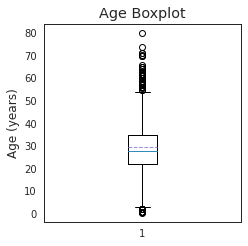

In [93]:
plt.subplot(232)
plt.boxplot(data1['Age'],showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (years)')

Text(0, 0.5, 'Family size (#)')

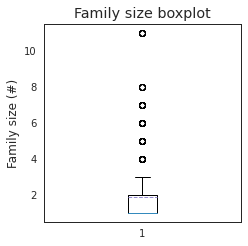

In [94]:
plt.subplot(233)
plt.boxplot(data1['FamilySize'],showmeans=True,meanline=True)
plt.title('Family size boxplot')
plt.ylabel('Family size (#)')


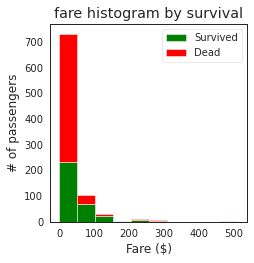

In [95]:
plt.subplot(234)
plt.hist(x=[data1[data1['Survived']==1]['Fare'],data1[data1['Survived']==0]['Fare']],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('fare histogram by survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of passengers')
plt.legend()

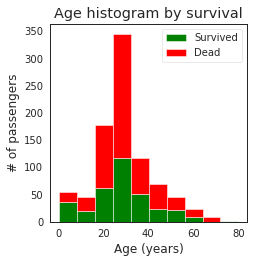

In [96]:
plt.subplot(235)
plt.hist(x=[data1[data1['Survived']==1]['Age'],data1[data1['Survived']==0]['Age']],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('Age histogram by survival')
plt.xlabel('Age (years)')
plt.ylabel('# of passengers')
plt.legend()

Text(0, 0.5, '# of passengers')

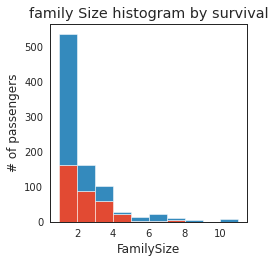

In [97]:
plt.subplot(236)
plt.hist(x= [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']==0]['FamilySize']],stacked=True,label=['Survived','Dead'])
plt.title('family Size histogram by survival')
plt.xlabel('FamilySize')
plt.ylabel('# of passengers')

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

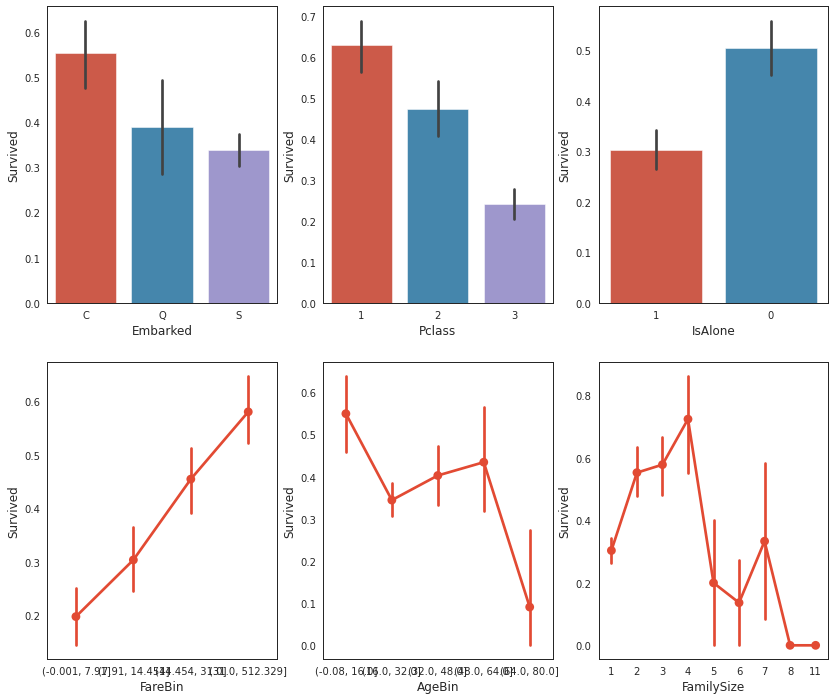

In [98]:
# graph individual features by survival 
fig, saxis = plt.subplots(2,3,figsize=(14,12))
sns.barplot(x='Embarked', y='Survived',order=['C','Q','S'],data=data1,ax=saxis[0,0])
sns.barplot(x='Pclass',y='Survived',order=[1,2,3],data=data1,ax=saxis[0,1])
sns.barplot(x='IsAlone',y='Survived',order=[1,0],data=data1,ax=saxis[0,2])
sns.pointplot(x='FareBin', y='Survived', data=data1,ax=saxis[1,0])
sns.pointplot(x='AgeBin',y='Survived',data=data1,ax=saxis[1,1])
sns.pointplot(x='FamilySize',y='Survived',data=data1,ax=saxis[1,2])

<AxesSubplot:xlabel='Pclass', ylabel='FamilySize'>

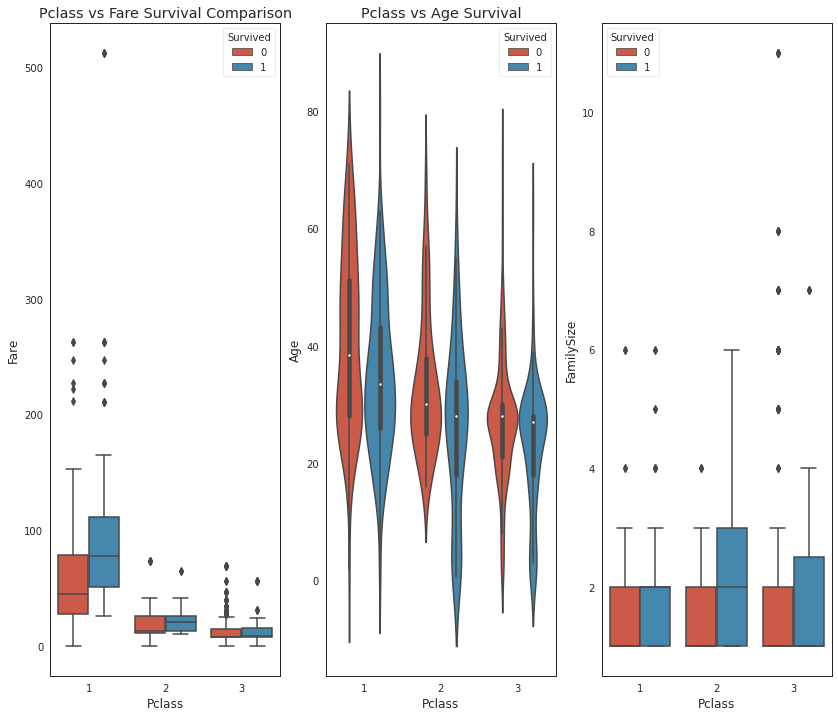

In [99]:
#graph distribution for Qualitative data
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,12))
sns.boxplot(x='Pclass',y='Fare',hue= 'Survived',data=data1,ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')
sns.violinplot(x='Pclass',y='Age',hue='Survived',data=data1,ax=axis2)
axis2.set_title('Pclass vs Age Survival')
sns.boxplot(x='Pclass',y='FamilySize',hue='Survived',data=data1,ax=axis3)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

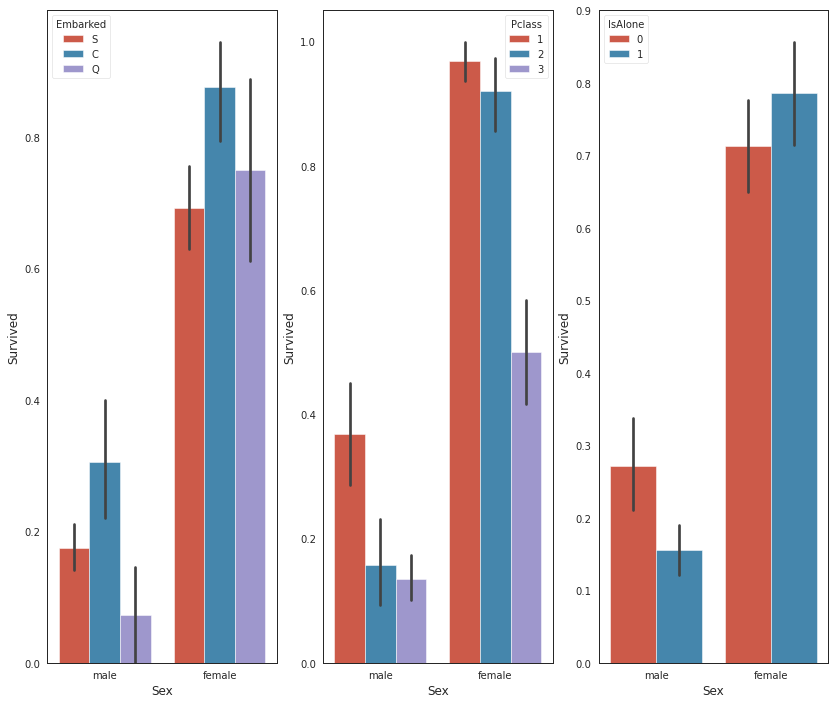

In [100]:
#graph distribution of qualitative data: Sex
fig, qaxis = plt.subplots(1,3,figsize=(14,12))
sns.barplot(x=data1.Sex, y=data1.Survived,hue=data1.Embarked,ax=qaxis[0])
sns.barplot(x=data1.Sex,y=data1.Survived,hue=data1.Pclass,ax=qaxis[1])
sns.barplot(x=data1.Sex,y=data1.Survived,hue=data1.IsAlone,ax=qaxis[2])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

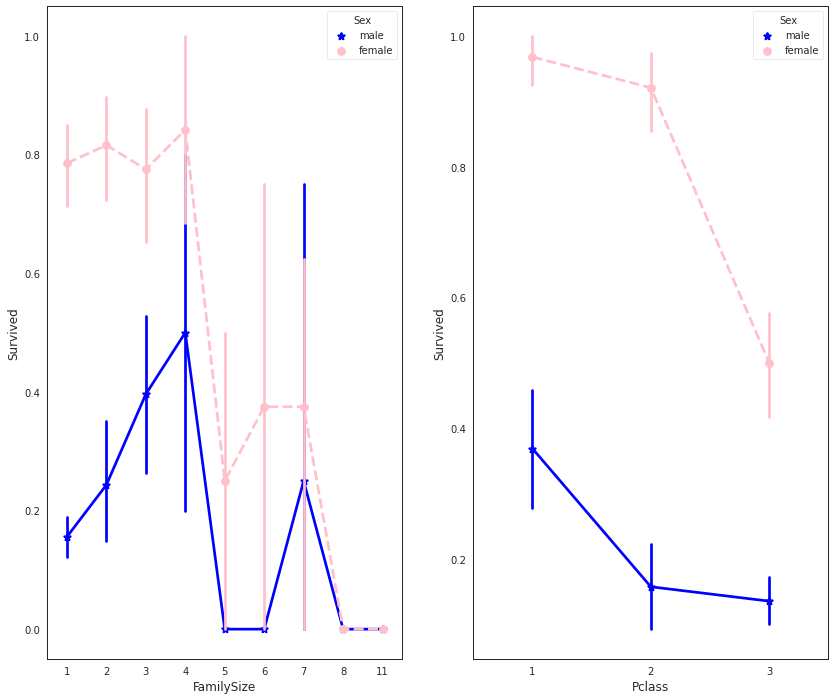

In [101]:
#more side by side comparisions 
fig, (maxis1,maxis2) = plt.subplots(1,2,figsize=(14,12))
#comparing familySize factor with sex and survival
sns.pointplot(x=data1.FamilySize,y=data1.Survived,hue=data1.Sex,ax=maxis1,palette={'male':'blue','female':'pink'},markers=['*','o'],linestyles=['-','--'])
# comparing class factor with sex and survival
sns.pointplot(x=data1.Pclass,y=data1.Survived,hue=data1.Sex,ax=maxis2,palette={'male':'blue','female':'pink'},markers=['*','o'],linestyles=['-','--'])

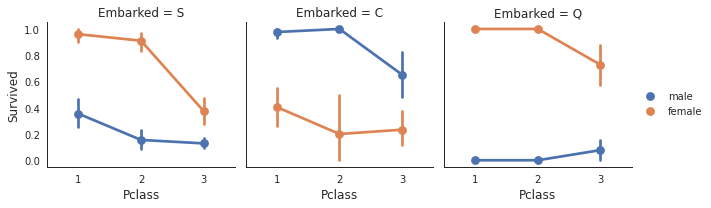

In [102]:
#comparision of embark port factor withi class, sex, and survival
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex',  palette = 'deep')
e.add_legend()


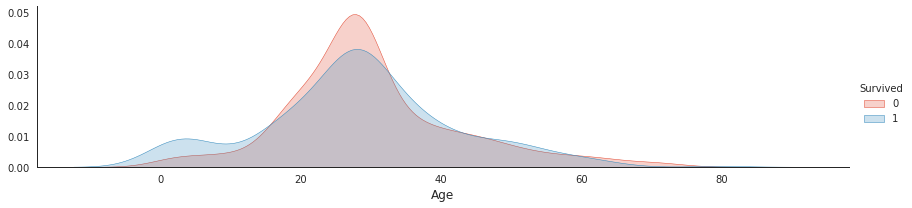

In [103]:
# plot distributions of age of passengers 
a = sns.FacetGrid(data1, hue='Survived',aspect=4)
a.map(sns.kdeplot,'Age',shade=True)
a.add_legend()

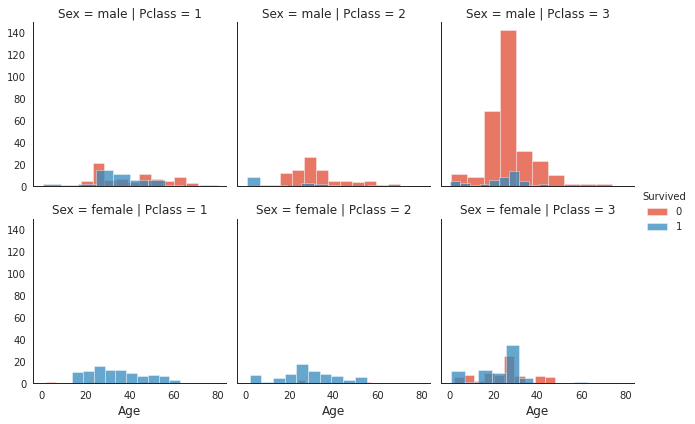

In [104]:
#histrogram comparasion of sex, class, and ae by survival
h = sns.FacetGrid(data1, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

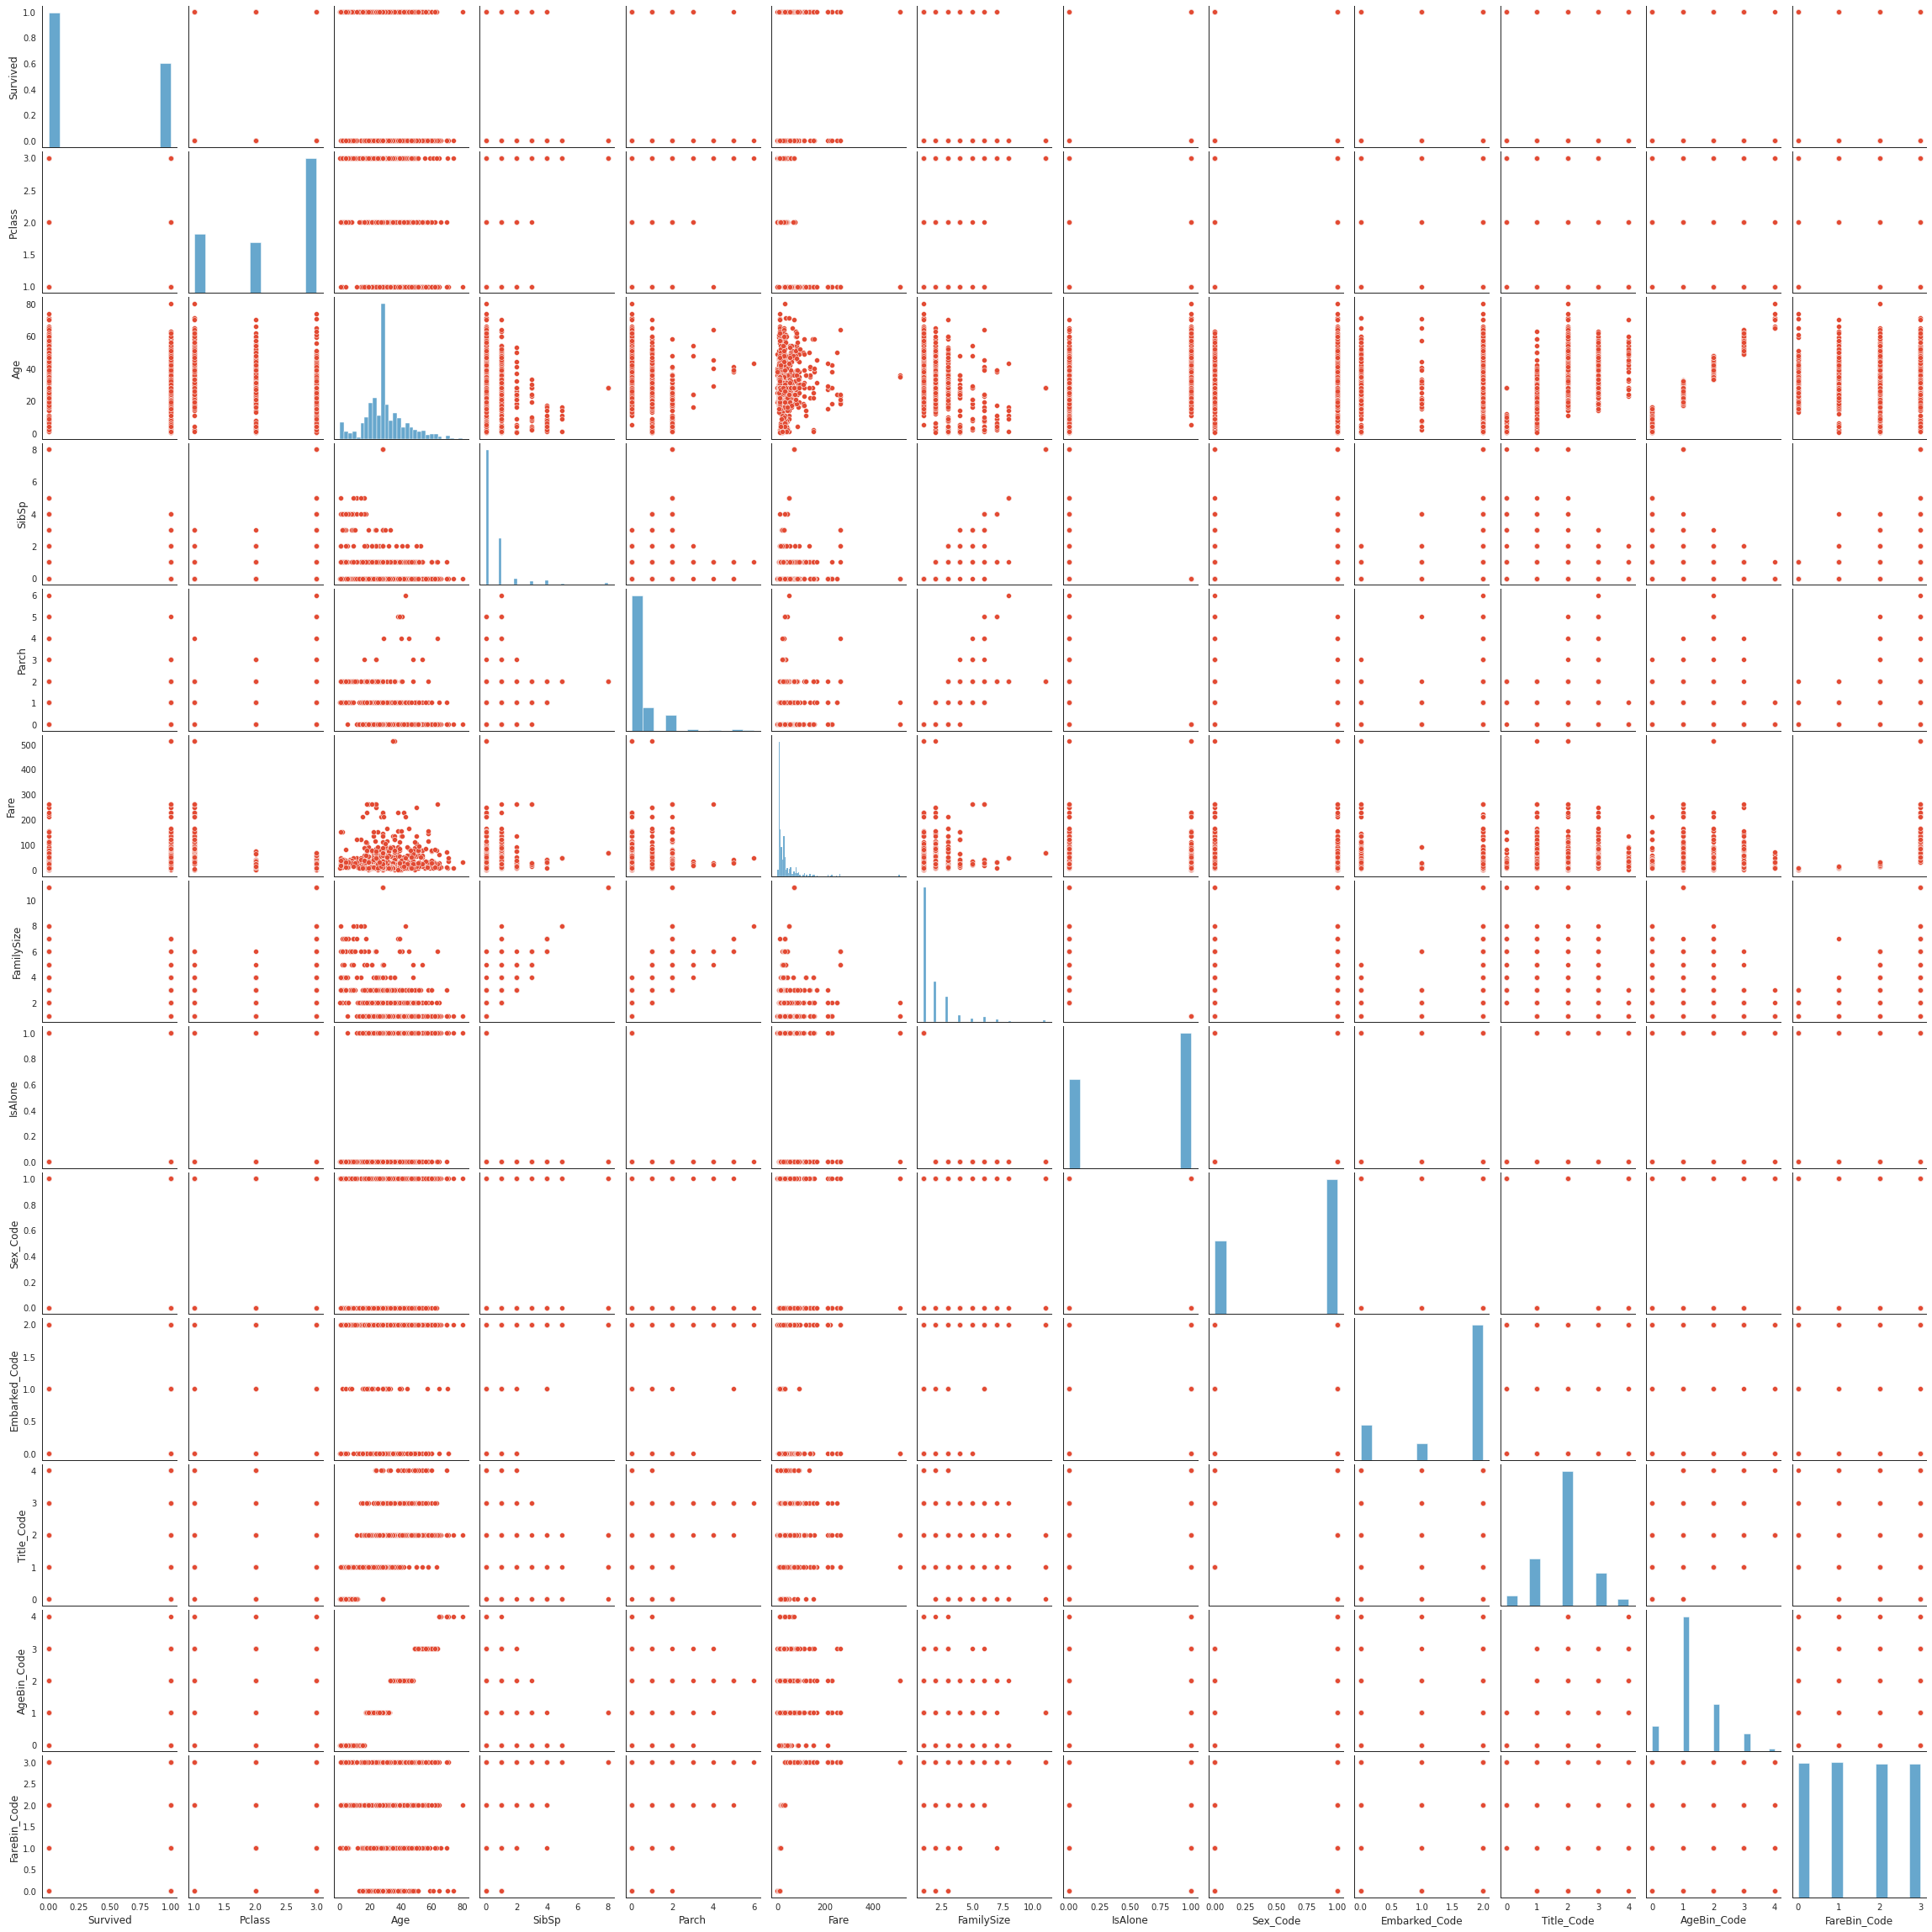

In [105]:
#pair plots of entire dataset
pp = sns.pairplot(data1)

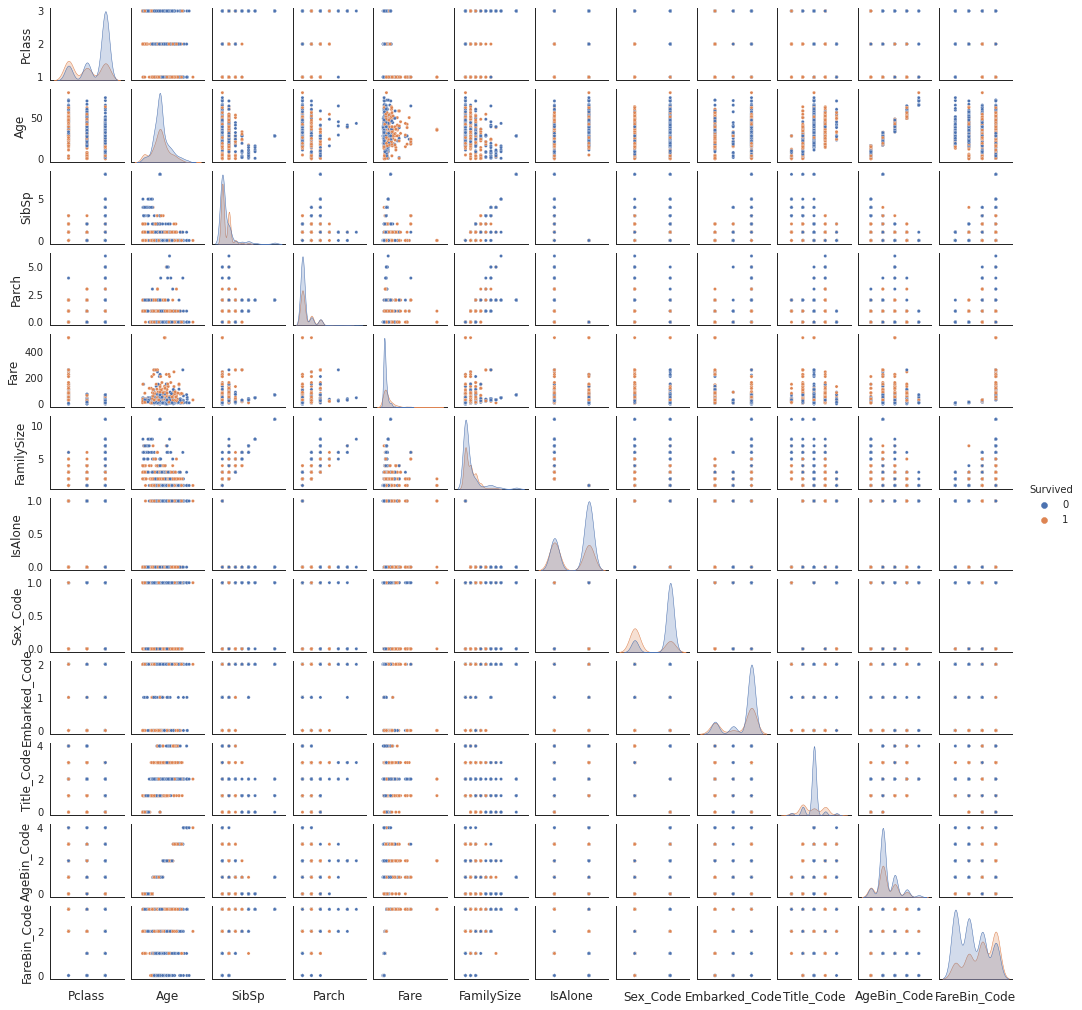

In [106]:
#pair plots of entire dataset
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

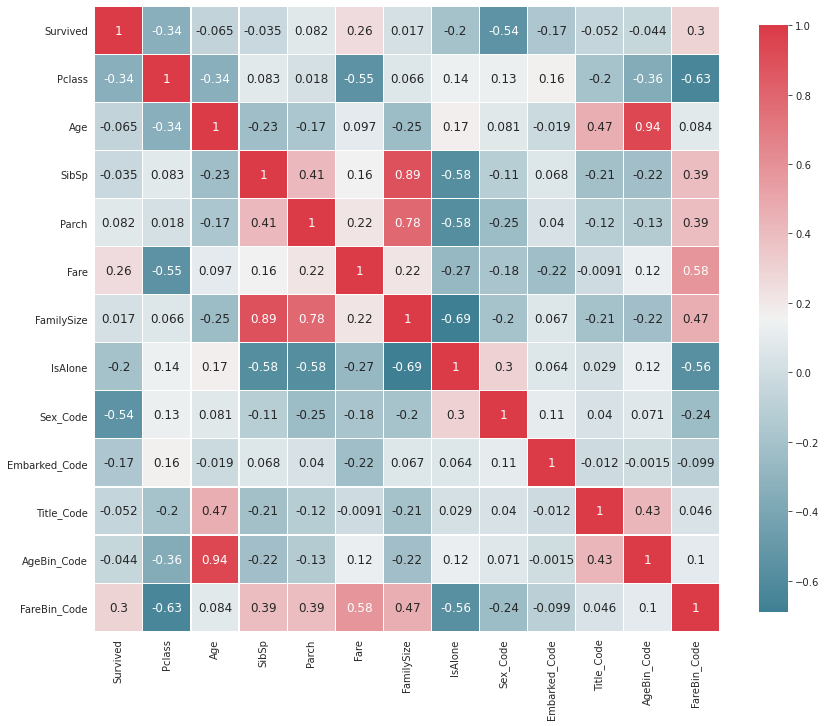

In [107]:
#correlation headmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize=(14,12))
    colormap = sns.diverging_palette(220,10,as_cmap=True)
    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square= True,
        cbar_kws={'shrink':.9},
        ax = ax,
        annot= True,
        linewidths=0.1,vmax=1.0,linecolor='white',
        annot_kws={'fontsize':12}
    )
    
    
correlation_heatmap(data1)

In [108]:
# Model the data
#Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    #Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    
    #xgboost: http://xgboost.readthedocs.io/en/latest/model.html
    XGBClassifier()    
    ]


In [109]:
#Splitting the dataset in cross-validation 
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=0.3,train_size=0.6)
print(cv_split)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.3, train_size=0.6)


In [110]:
#creating a table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD' ,'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)
print(MLA_columns)

['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']


In [111]:
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv  = cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()   
    #if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    MLA_compare.loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3   #let's know the worst that can happen!
    

    #save MLA predictions - see section 6 for usage
    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])
    
    row_index+=1

    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
MLA_compare
#MLA_predict

KeyError: 'train_score'